In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('race_records_cleaned.csv')
df.head()

,race_day,year,race_name,race_distance/length,num_of_finishers,ID,gender,athlete_country,athlete_age,athlete_performance,ave_speed
0,2018-01-06,2018,Selva Costera (CHI),50km,22,0,M,CHI,40,4:51:39 h,10.286
1,2018-01-06,2018,Selva Costera (CHI),50km,22,1,M,CHI,37,5:15:45 h,9.501
2,2018-01-06,2018,Selva Costera (CHI),50km,22,2,M,CHI,31,5:16:44 h,9.472
3,2018-01-06,2018,Selva Costera (CHI),50km,22,3,M,ARG,42,5:34:13 h,8.976
4,2018-01-06,2018,Selva Costera (CHI),50km,22,4,M,CHI,26,5:54:14 h,8.469


In [3]:
df.shape

(5170645, 11)

## Exploratory Data Analysis (EDA)

### **1.** Show the top 20 most frequent race locations. 

In [6]:
# Create column named 'location'
df['location'] = df['race_name'].str.extract(r'\((.*?)\)')

In [7]:
location_counts = df['location'].value_counts().reset_index()
location_counts = location_counts.head(20)
location_counts

,location,count
0,USA,1082672
1,RSA,874511
2,FRA,793395
3,JPN,359739
4,GER,263638
5,ITA,219788
6,GBR,165484
7,CHN,142350
8,ESP,120753
9,TPE,108508


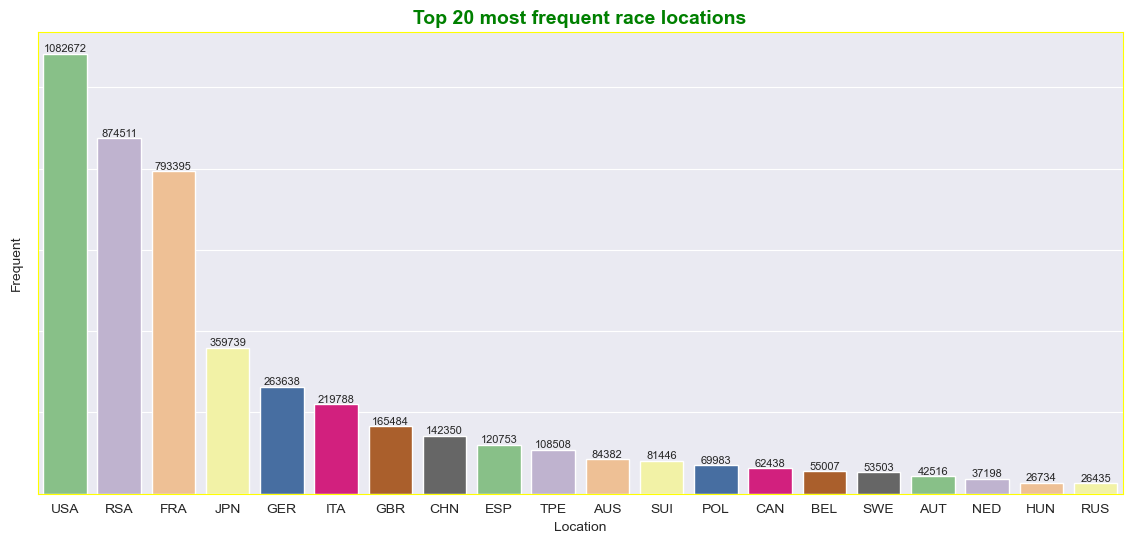

In [8]:
# Data visualization

custom = {"axes.edgecolor": "yellow", "grid.linestyle": "-", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)
PALETTE = sns.color_palette("Accent", 20) 
plt.rcParams["figure.figsize"] = (14,6)
ax = sns.barplot(data = location_counts,x = 'location',y ='count',hue = 'location',palette = PALETTE)
ax.set_yticklabels([])
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=8, label_type='edge')
ax.set_xlabel("Location")
ax.set_ylabel("Frequent")
ax.set_title("Top 20 most frequent race locations",fontsize=14,fontweight="bold",color="green");

### **2.** Filter the races held in the USA

In [10]:
df['race_name'].nunique()

19018

In [11]:
# Filter the races held in the USA
df_usa_races = df[df['race_name'].str.endswith('(USA)')]
df_usa_races.head()

,race_day,year,race_name,race_distance/length,num_of_finishers,ID,gender,athlete_country,athlete_age,athlete_performance,ave_speed,location
50,2018-01-06,2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,55,M,USA,35,9:53:05 h,8.141,USA
51,2018-01-06,2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,56,F,CAN,41,11:09:35 h,7.211,USA
52,2018-01-06,2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,57,M,CAN,42,11:33:00 h,6.967,USA
53,2018-01-06,2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,58,M,USA,32,11:38:17 h,6.914,USA
54,2018-01-06,2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,59,M,USA,30,11:56:35 h,6.738,USA


In [12]:
race_usa_counts = df_usa_races['race_name'].value_counts()
race_usa_counts 

race_name
JFK 50 Mile (USA)                                     29677
American River 50 Mile Endurance Run (USA)            17192
Way Too Cool 50K Endurance Run (USA)                  16208
Rachel Carson Trail Challenge (USA)                    8453
The HAT Run 50K (USA)                                  7778
                                                      ...  
Allegheny Trailrunners Trail Fest 6 Hour Run (USA)        1
Steep Camp Sunrise 6 Hour Race (USA)                      1
50mi Baltimore (USA)                                      1
Across the Years, 24h - 50km Split (USA)                  1
Trap Trail 12 Hour Run (USA)                              1
Name: count, Length: 4269, dtype: int64

As we can see, the race named 'JFK 50 Mile (USA)' has the highest number of runners (29,677).

### **3.** Analyze the race named JFK 50 Mile (USA) from 2000

In [15]:
df_JFK50 = df_usa_races.loc[(df_usa_races['race_name']=="JFK 50 Mile (USA)") & (df_usa_races['year'] >= 2000) ]
df_JFK50.head()

,race_day,year,race_name,race_distance/length,num_of_finishers,ID,gender,athlete_country,athlete_age,athlete_performance,ave_speed,location
447702,2018-11-17,2018,JFK 50 Mile (USA),50mi,763,33246,M,USA,23,5:34:22 h,14.439,USA
447703,2018-11-17,2018,JFK 50 Mile (USA),50mi,763,35529,M,USA,30,5:41:02 h,14.157,USA
447704,2018-11-17,2018,JFK 50 Mile (USA),50mi,763,360727,M,USA,32,6:00:48 h,13.381,USA
447705,2018-11-17,2018,JFK 50 Mile (USA),50mi,763,143692,M,USA,40,6:04:03 h,13.262,USA
447706,2018-11-17,2018,JFK 50 Mile (USA),50mi,763,229520,M,CAN,23,6:09:52 h,13.053,USA


#### **3.1** The completion rate of the race based on the total number of runners participating

In [17]:
#The number of participating runners
runners_by_year_counts = df_JFK50['year'].value_counts().sort_index().reset_index()
runners_by_year_counts

,year,count
0,2000,703
1,2001,818
2,2002,862
3,2003,829
4,2004,876
5,2005,949
6,2006,1015
7,2007,1078
8,2008,927
9,2009,1016


In [18]:
# The number of runners who completed the race
num_finisher_JFK50 = df_JFK50.groupby('year')['num_of_finishers'].mean().astype(int).reset_index()
num_finisher_JFK50

,year,num_of_finishers
0,2000,703
1,2001,818
2,2002,862
3,2003,830
4,2004,876
5,2005,951
6,2006,1016
7,2007,1078
8,2008,927
9,2009,1016


In [19]:
#Combine 2 Dataframes 
df_3_1 = pd.merge(runners_by_year_counts,num_finisher_JFK50,on='year', how='outer')
df_3_1

,year,count,num_of_finishers
0,2000,703,703
1,2001,818,818
2,2002,862,862
3,2003,829,830
4,2004,876,876
5,2005,949,951
6,2006,1015,1016
7,2007,1078,1078
8,2008,927,927
9,2009,1016,1016


In [20]:
df_3_1['completion_rate'] = ((df_3_1['num_of_finishers']/df_3_1['count'])*100).round(2)
df_3_1

,year,count,num_of_finishers,completion_rate
0,2000,703,703,100.00
1,2001,818,818,100.00
2,2002,862,862,100.00
3,2003,829,830,100.12
4,2004,876,876,100.00
5,2005,949,951,100.21
6,2006,1015,1016,100.10
7,2007,1078,1078,100.00
8,2008,927,927,100.00
9,2009,1016,1016,100.00


We can conclude that all the runners who participated completed the race

#### **3.2** Average of Minimum and Maximum Speeds Over the Years by Gender

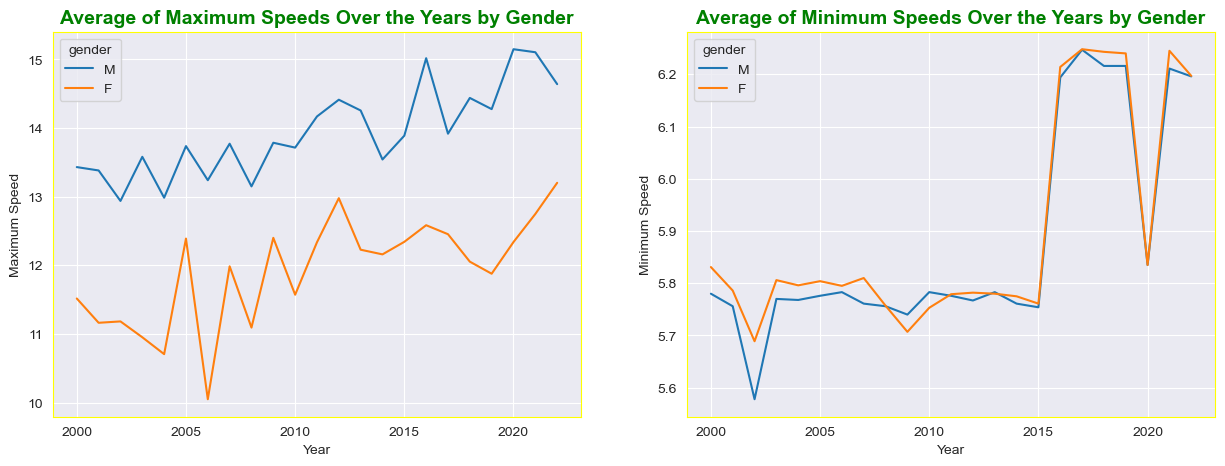

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(data=df_JFK50,x='year',y='ave_speed',estimator=np.max,hue ='gender',errorbar = None,ax=axes[0]);
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Maximum Speed")
axes[0].set_title("Average of Maximum Speeds Over the Years by Gender",fontsize=14,fontweight="bold",color="green");


sns.lineplot(data=df_JFK50,x='year',y='ave_speed',estimator=np.min,hue ='gender',errorbar = None,ax=axes[1]);
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Minimum Speed")
axes[1].set_title("Average of Minimum Speeds Over the Years by Gender",fontsize=14,fontweight="bold",color="green");

The plots effectively illustrate the differences and trends in both maximum and minimum speeds by gender.
- Males have higher maximum speeds compared to females throughout the years.
- The gap between male and female maximum speeds appears to be fairly consistent, though it narrows slightly towards the more recent years.
- The minimum speeds for males and females are relatively close to each other.
- There is a significant spike in the minimum speeds for both genders around the year 2015, followed by a sharp decline and subsequent recovery.

#### **3.3** The average age of runners by year and gender

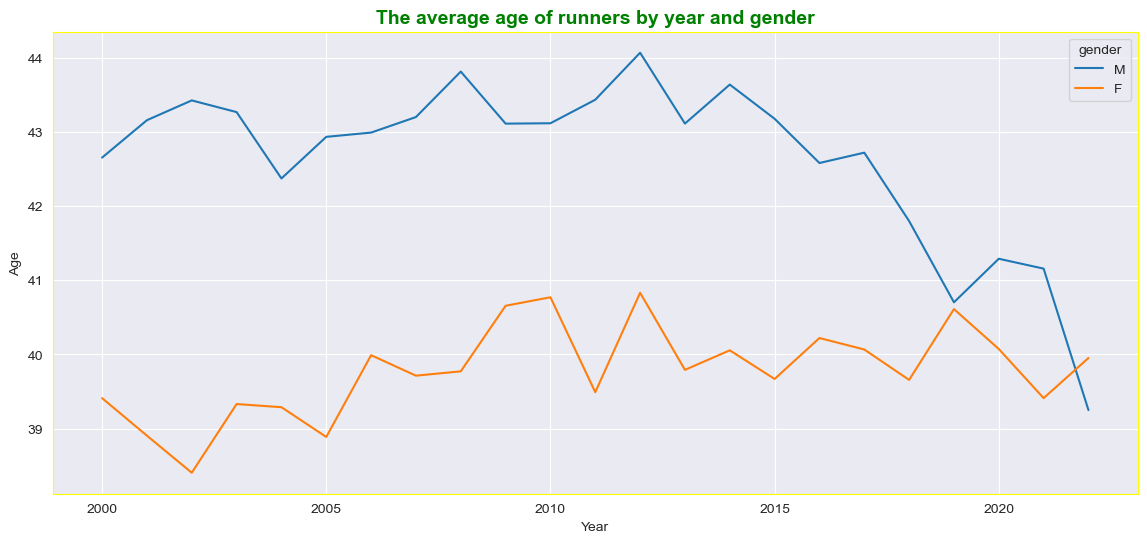

In [26]:
ax = sns.lineplot(data=df_JFK50,x='year',y='athlete_age',estimator=np.mean,hue = 'gender',errorbar =None);
ax.set_xlabel("Year")
ax.set_ylabel("Age")
ax.set_title("The average age of runners by year and gender",fontsize=14,fontweight="bold",color="green");

The chart displays the average age of runners by year and gender from 2000 to 2023. Key observations include:
- For males, there is a gradual decrease in average age over the years, with noticeable fluctuations around 2010 and a more pronounced decline post-2015.
- Throughout the period, the average age of male runners is consistently higher than that of female runners.
- The most recent data points show a significant decline in the average age for both genders, with a sharper drop observed for males.

### **4.** Analyze the most attended race in RSA (Republic of South Africa)

In [29]:
# Filter out the races held in RSA
df_races_RSA = df[df['race_name'].str.endswith('(RSA)')]
df_races_RSA.head()

,race_day,year,race_name,race_distance/length,num_of_finishers,ID,gender,athlete_country,athlete_age,athlete_performance,ave_speed,location
10337,2018-03-17,2018,Om Die Dam 50km (RSA),50km,2491,14178,M,ZIM,47,2:59:14 h,16.738,RSA
10338,2018-03-17,2018,Om Die Dam 50km (RSA),50km,2491,14179,M,ZIM,33,3:00:41 h,16.604,RSA
10339,2018-03-17,2018,Om Die Dam 50km (RSA),50km,2491,14180,M,RSA,34,3:01:16 h,16.550,RSA
10340,2018-03-17,2018,Om Die Dam 50km (RSA),50km,2491,14181,M,RSA,43,3:05:50 h,16.143,RSA
10341,2018-03-17,2018,Om Die Dam 50km (RSA),50km,2491,14182,M,RSA,35,3:05:57 h,16.133,RSA


In [30]:
#Find the most attended race
race_RSA_counts = df_races_RSA['race_name'].value_counts()
race_RSA_counts 

race_name
Two Oceans Marathon (RSA)                 253073
Comrades Marathon - Down Run (RSA)        216802
Comrades Marathon - Up Run (RSA)          212179
Two Oceans Marathon - 50km Split (RSA)     84653
Om Die Dam 50km (RSA)                      30925
                                           ...  
Kenton 30 Miler (RSA)                          2
Capital Classic 100 Km (RSA)                   2
Outeniqua Quest Xtreme - 132km (RSA)           1
Delville 50 miles (RSA)                        1
George 50km Walking (RSA)                      1
Name: count, Length: 137, dtype: int64

As we can see, the race named 'Two Oceans Marathon (RSA)' has the highest number of runners (253,073)

In [32]:
df4 = df_races_RSA.loc[df_races_RSA['race_name']=='Two Oceans Marathon (RSA)']
df4.head()

,race_day,year,race_name,race_distance/length,num_of_finishers,ID,gender,athlete_country,athlete_age,athlete_performance,ave_speed,location
127139,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133335,M,KEN,25,3:09:22 h,17.743,RSA
127140,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133336,M,LES,36,3:10:32 h,17.635,RSA
127141,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133337,M,RSA,37,3:11:13 h,17.572,RSA
127142,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133338,M,KEN,38,3:11:58 h,17.503,RSA
127143,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133339,M,RSA,35,3:12:09 h,17.486,RSA


In [54]:
# Create column named "time_hours"
df4 = df4.copy()
df4.loc[:,'time_hours'] = df4['athlete_performance'].str.extract(r'(\d+):(\d+):(\d+)').astype(float).apply(lambda x: x[0] + x[1] / 60 + x[2] / 3600, axis=1)

In [74]:
df4['time_hours']

127139     3.156111
127140     3.175556
127141     3.186944
127142     3.199444
127143     3.202500
             ...   
5166593    5.999722
5166594    5.999722
5166595    5.999722
5166596    5.999722
5166597    5.999722
Name: time_hours, Length: 253073, dtype: float64

In [58]:
# Create column named "distance_km"
df4.loc[:,'distance_km'] = df4['race_distance/length'].str.replace('km', '').astype(float)

In [60]:
df4['distance_km']

127139     56.0
127140     56.0
127141     56.0
127142     56.0
127143     56.0
           ... 
5166593    56.0
5166594    56.0
5166595    56.0
5166596    56.0
5166597    56.0
Name: distance_km, Length: 253073, dtype: float64

In [62]:
df4.loc[:,'calculated_ave_speed'] = df4['distance_km'] / df4['time_hours']

In [64]:
df4.head()

,race_day,year,race_name,race_distance/length,num_of_finishers,ID,gender,athlete_country,athlete_age,athlete_performance,ave_speed,location,time_hours,distance_km,calculated_ave_speed
127139,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133335,M,KEN,25,3:09:22 h,17.743,RSA,3.156111,56.0,17.743355
127140,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133336,M,LES,36,3:10:32 h,17.635,RSA,3.175556,56.0,17.634710
127141,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133337,M,RSA,37,3:11:13 h,17.572,RSA,3.186944,56.0,17.571690
127142,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133338,M,KEN,38,3:11:58 h,17.503,RSA,3.199444,56.0,17.503039
127143,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133339,M,RSA,35,3:12:09 h,17.486,RSA,3.202500,56.0,17.486339


#### **4.1** Which age groups perform best in the race?

In [66]:
df_4_1 = df4.groupby('athlete_age')['calculated_ave_speed'].agg(['mean','count']).sort_values('mean',ascending= False).query('count>1000') 
df_4_1 = df_4_1.sort_index().reset_index()
df_4_1

,athlete_age,mean,count
0,21,10.906743,1368
1,22,10.999994,1810
2,23,11.025225,2326
3,24,10.996288,2940
4,25,10.979006,3612
5,26,10.924052,4267
6,27,10.931937,5024
7,28,10.887375,5904
8,29,10.865827,6711
9,30,10.818467,7543


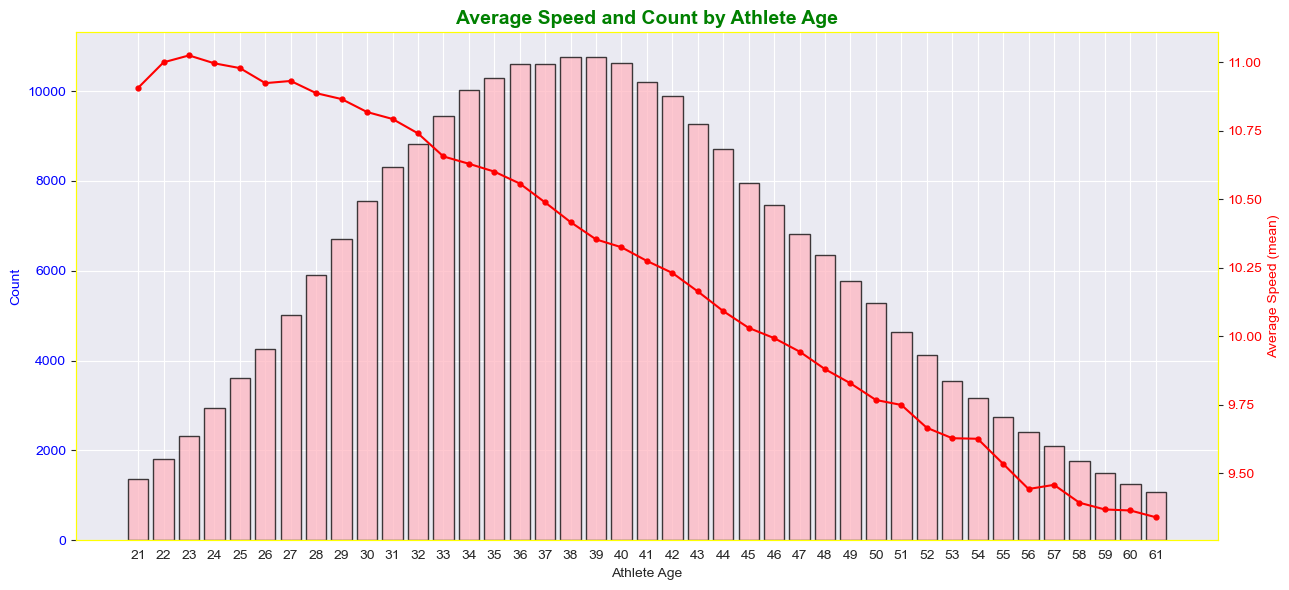

In [68]:
# Data Visualization
fig, ax1 = plt.subplots(figsize=(13, 6))
# Biểu đồ cột cho 'count'
ax1.bar(df_4_1['athlete_age'],df_4_1['count'], alpha=0.75,
        facecolor='lightpink', edgecolor='black',ls = "-", label='Count')
ax1.set_xlabel('Athlete Age')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Biểu đồ đường cho 'mean'
ax2 = ax1.twinx()
ax2.plot(df_4_1['athlete_age'],df_4_1['mean'], color='red', marker='o',markersize=3.5, linewidth=1.5, label='Mean')
ax2.set_ylabel('Average Speed (mean)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Average Speed and Count by Athlete Age',fontsize=14,fontweight="bold",color="green")
ax1.set_xticks(df_4_1['athlete_age'])
ax1.set_xticklabels(df_4_1['athlete_age'], rotation=0)

fig.tight_layout()
plt.grid(axis='y')
plt.show()

- The highest participation is observed between the ages of 30 and 40, and it  tends to decrease significantly after age 40
- Younger athletes (around 21-25 years old) have the highest average speed.
- There is a consistent decrease in average speed as the age increases, indicating that older athletes generally have lower average speeds.- 
By age 60, the average speed drops to its lowest point in the chart..

#### **4.2** Does the weather affect the speed of race participants?

- Spring : 3-5
- Summer: 6-8
- Fall: 9-11
- Winter: 12 -2

In [70]:
# Create a column named "month" from column "race_day"
df_4_2 = df4
df_4_2.loc[:, 'month']=  df_4_2['race_day'].str.split('-').str[1].astype(int)
df_4_2.head()

,race_day,year,race_name,race_distance/length,num_of_finishers,ID,gender,athlete_country,athlete_age,athlete_performance,ave_speed,location,time_hours,distance_km,calculated_ave_speed,month
127139,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133335,M,KEN,25,3:09:22 h,17.743,RSA,3.156111,56.0,17.743355,3
127140,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133336,M,LES,36,3:10:32 h,17.635,RSA,3.175556,56.0,17.634710,3
127141,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133337,M,RSA,37,3:11:13 h,17.572,RSA,3.186944,56.0,17.571690,3
127142,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133338,M,KEN,38,3:11:58 h,17.503,RSA,3.199444,56.0,17.503039,3
127143,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133339,M,RSA,35,3:12:09 h,17.486,RSA,3.202500,56.0,17.486339,3


In [72]:
df_4_2['month'].unique()

array([3, 4, 5])

So throughout the history of the event, it has only been held in spring 

In [74]:
# Create column named "season"
df_4_2.loc[:,'season']=df_4_2['month'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x >8 else 'Summer' if x>5 else 'Spring' if x>2 else 'Winter' )

In [76]:
df_4_2.head()

,race_day,year,race_name,race_distance/length,num_of_finishers,ID,gender,athlete_country,athlete_age,athlete_performance,ave_speed,location,time_hours,distance_km,calculated_ave_speed,month,season
127139,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133335,M,KEN,25,3:09:22 h,17.743,RSA,3.156111,56.0,17.743355,3,Spring
127140,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133336,M,LES,36,3:10:32 h,17.635,RSA,3.175556,56.0,17.634710,3,Spring
127141,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133337,M,RSA,37,3:11:13 h,17.572,RSA,3.186944,56.0,17.571690,3,Spring
127142,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133338,M,KEN,38,3:11:58 h,17.503,RSA,3.199444,56.0,17.503039,3,Spring
127143,2018-03-31,2018,Two Oceans Marathon (RSA),56km,9200,133339,M,RSA,35,3:12:09 h,17.486,RSA,3.202500,56.0,17.486339,3,Spring


In [80]:
df_4_2_new = df_4_2.groupby('month')['calculated_ave_speed'].max().reset_index()
df_4_2_new

,month,calculated_ave_speed
0,3,18.096948
1,4,18.287373
2,5,16.374269
